In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


character(0)

In [2]:
library(rpart)
library(rpart.plot)
library(caret)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress




In [3]:
data("iris")

In [4]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [6]:
summary(iris)


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [7]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [8]:
set.seed(123)

In [9]:
train_index <- createDataPartition(iris$Species, p = 0.7, list = FALSE)
train_data <- iris[train_index, ]
test_data <- iris[-train_index, ]

In [10]:
decision_tree_model <- rpart(Species ~ ., data = train_data, method = "class")

In [11]:
print(decision_tree_model)

n= 105 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 105 70 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.6 35  0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.6 70 35 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Width< 1.65 36  2 versicolor (0.00000000 0.94444444 0.05555556) *
    7) Petal.Width>=1.65 34  1 virginica (0.00000000 0.02941176 0.97058824) *


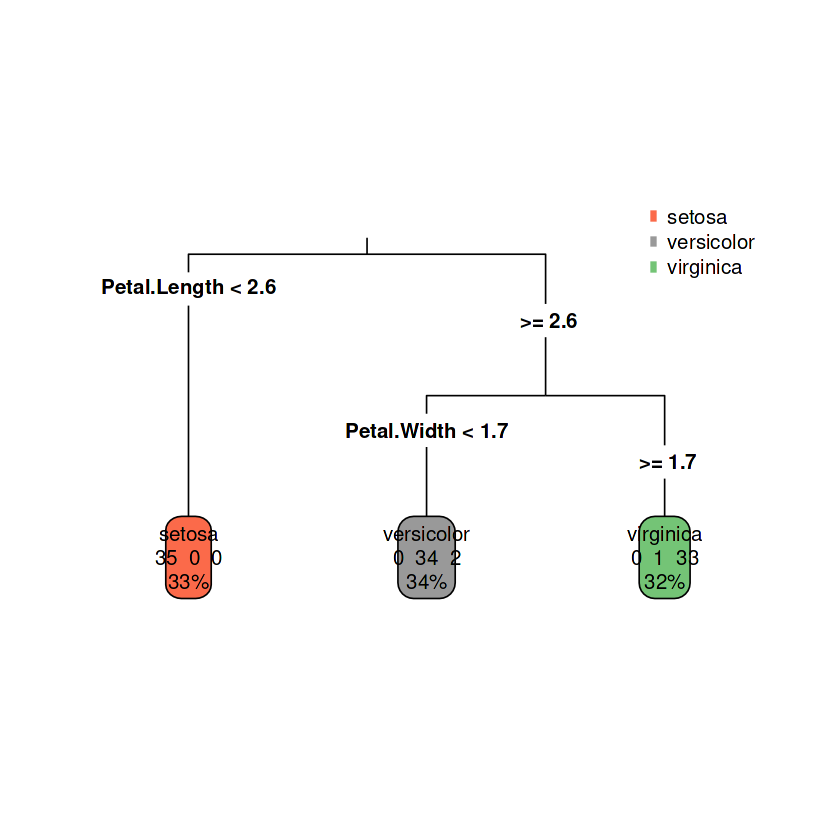

In [12]:
rpart.plot(decision_tree_model, type = 3, extra = 101, fallen.leaves = TRUE)

In [13]:
predictions <- predict(decision_tree_model, test_data, type = "class")

In [14]:
confusion_matrix <- confusionMatrix(predictions, test_data$Species)

In [15]:
print(confusion_matrix)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         14         2
  virginica       0          1        13

Overall Statistics
                                         
               Accuracy : 0.9333         
                 95% CI : (0.8173, 0.986)
    No Information Rate : 0.3333         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9            
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9333           0.8667
Specificity                 1.0000            0.9333           0.9667
Pos Pred Value              1.0000            0.8750           0.9286
Neg Pred Value              1.0000            0.9655           0.9355
Prevalence

In [16]:
accuracy <- confusion_matrix$overall['Accuracy']
print(paste("Accuracy: ", round(accuracy, 2)))

[1] "Accuracy:  0.93"


In [17]:
print(confusion_matrix$byClass)

                  Sensitivity Specificity Pos Pred Value Neg Pred Value
Class: setosa       1.0000000   1.0000000      1.0000000      1.0000000
Class: versicolor   0.9333333   0.9333333      0.8750000      0.9655172
Class: virginica    0.8666667   0.9666667      0.9285714      0.9354839
                  Precision    Recall        F1 Prevalence Detection Rate
Class: setosa     1.0000000 1.0000000 1.0000000  0.3333333      0.3333333
Class: versicolor 0.8750000 0.9333333 0.9032258  0.3333333      0.3111111
Class: virginica  0.9285714 0.8666667 0.8965517  0.3333333      0.2888889
                  Detection Prevalence Balanced Accuracy
Class: setosa                0.3333333         1.0000000
Class: versicolor            0.3555556         0.9333333
Class: virginica             0.3111111         0.9166667
